# Classifying Sentiment with Supervised Learning

## Import necessary depencencies

In [1]:
#Let’s load the necessary dependencies and settings
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

In [2]:
#We can now load our IMDb movie reviews dataset, use the first 35,000 reviews for training models and
#the remaining 15,000 reviews as the test dataset to evaluate model performance. Besides this, we will also
#use our normalization module to normalize our review datasets
dataset = pd.read_csv(r'data\movie_reviews.csv')

# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# normalize datasets
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# Traditional Supervised Machine Learning Models

## Feature Engineering

In [3]:
#We will be using traditional classification models in this section to classify the sentiment of our movie
#reviews. Our feature engineering techniques will be based on the Bag of Words model and the TF-IDF model

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [4]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [5]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2104735)  Test features shape: (15000, 2104735)
TFIDF model:> Train features shape: (35000, 2104735)  Test features shape: (15000, 2104735)


## Model Training, Prediction and Performance Evaluation

In [6]:
#We take into account word as well as bi-grams for our feature-sets. We can now use some traditional
#supervised Machine Learning algorithms which work very well on text classification. We recommend using
#logistic regression, support vector machines, and multinomial Naïve Bayes models when you work on your
#own datasets in the future.
#we built models using Logistic Regression as well as SVM
#The following snippet helps initialize these classification model estimators
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter=100)

In [7]:
#We will now use our utility function train_predict_model(...) from our model_evaluation_utils
#module to build a logistic regression model on our training features and evaluate the model performance on
#our test features

# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9057
Precision: 0.9057
Recall: 0.9057
F1 Score: 0.9057

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.91      0.91      7510
   negative       0.91      0.90      0.91      7490

avg / total       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6823      687
        negative        727     6763


In [8]:
#We get an overall F1-Score and model accuracy of 91%, which is really
#excellent! We can now build a logistic regression model similarly on our TF-IDF features using the following snippet.

# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.895
Precision: 0.8951
Recall: 0.895
F1 Score: 0.895

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.90      0.90      7510
   negative       0.90      0.89      0.89      7490

avg / total       0.90      0.90      0.89     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6782      728
        negative        847     6643


In [9]:
#We get an overall F1-Score and model accuracy of 90%, which is great
#but our previous model is still slightly better. You can similarly use the Support Vector Machine model
#estimator object svm, which we created earlier, and use the same snippet to train and predict using an SVM model

svm_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.9045
Precision: 0.9045
Recall: 0.9045
F1 Score: 0.9045

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.91      0.90      0.90      7510
   negative       0.90      0.91      0.90      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6760      750
        negative        683     6807


In [10]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

#We obtained a maximum accuracy and F1-score of 90% with the SVM model
#Thus you can see how effective and accurate these supervised
#Machine Learning classification algorithms are in building a text sentiment classifier

C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.8971
Precision: 0.8974
Recall: 0.8971
F1 Score: 0.897

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.91      0.90      7510
   negative       0.91      0.88      0.90      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6841      669
        negative        875     6615


# Newer Supervised Deep Learning Models

In [11]:
#we will be building some deep neural networks and train them on some advanced text features based on word embeddings
#to build a text sentiment classification system similar to what we did in the previous section. Let’s load the
#following necessary dependencies before we start our analysis.
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

C:\Users\RUIZ\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\RUIZ\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Prediction class label encoding

In [12]:
#So far, our models in scikit-learn directly accepted the sentiment class labels as
#positive and negative and internally performed these operations. However for our Deep Learning models,
#we need to do this explicitly. The following snippet helps us tokenize our movie reviews and also converts
#the text-based sentiment class labels into one-hot encoded vectors
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [13]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'positive' 'negative'] 
Encoded Labels: [0 1 0] 
One hot encoded Labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]]


## Feature Engineering with word embeddings

In [14]:
#Thus, we can see from the preceding sample outputs how our sentiment class labels have been encoded
#into numeric representations, which in turn have been converted into one-hot encoded vectors. The
#feature engineering techniques we will be using in this section are slightly more advanced word
#vectorization techniques that are based on the concept of word embeddings. We will be using the word2vec
#and GloVe models to generate embeddings. We will be choosing the size parameter to
#be 500 in this scenario representing feature vector size to be 500 for each word
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)

In [15]:
#We will be using the document word vector averaging scheme on this model to
#represent each movie review as an averaged vector of all the word vector representations for the different
#words in the review. The following function helps us compute averaged word vector representations for any
#corpus of text documents.
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
#We can now use the previous function to generate averaged word vector representations on our two
#movie review datasets.
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

C:\Users\RUIZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [27]:
#The GloVe model, which stands for Global Vectors, is an unsupervised model for obtaining word vector
#representations.The spacy library provided 300-dimensional word vectors trained on the Common Crawl corpus using the GloVe
#model. They provide a simple standard interface to get feature vectors of size 300 for each word as well as the
#averaged feature vector of a complete text document. The following snippet leverages spacy to get the GloVe
#embeddings for our two datasets.
# feature engineering with GloVe model
train_nlp = [tn.nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

KeyboardInterrupt: 

In [ ]:
#You can check the feature vector dimensions for our datasets based on each of the previous models
#using the following code.
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

# Modeling with deep neural networks

## Building Deep neural network architecture

In [ ]:
# We can see from the preceding output that as expected the word2vec model features are of size 500
# and the GloVe features are of size 300. We can now proceed to Step 4 of our classification system workflow
#where we will build and train a deep neural network on these features.
#We will be using a fully-connected four layer deep neural network (multi-layer perceptron or deep
#ANN) for our model. We do not count the input layer usually in any deep architecture, hence our model will
#consist of three hidden layers of 512 neurons or units and one output layer with two units that will be used to
#either predict a positive or negative sentiment based on the input layer features.

#We call this a fully connected deep neural network (DNN) because neurons or units in each pair
#of adjacent layers are fully pairwise connected. These networks are also known as deep artificial neural
#networks (ANNs) or Multi-Layer Perceptrons (MLPs) since they have more than one hidden layer. The
#following function leverages keras on top of tensorflow to build the desired DNN model.

def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [ ]:
#From the preceding function, you can see that we accept a parameter num_input_features, which
#decides the number of units needed in the input layer (500 for word2vec and 300 for glove features). We
#build a Sequential model, which helps us linearly stack our hidden and output layers.

#Let’s now build a DNN model based on our word2vec input feature representations for our training reviews
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

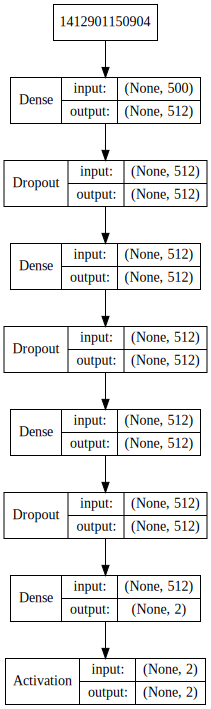

In [28]:
#You can also visualize the DNN model architecture with the help of keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

## Model Training, Prediction and Performance Evaluation

In [29]:
#We will now be training our model on our training reviews dataset of word2vec features represented
#by avg_wv_train_features. We will be using the fit(...) function from keras for the training
#process and there are some parameters which you should be aware of. The epoch parameter indicates one
#complete forward and backward pass of all the training examples through the network. The batch_size
#parameter indicates the total number of samples which are propagated through the DNN model at a time
#for one backward and forward pass for training the model and updating the gradient. Thus if you have 1,000
#observations and your batch size is 100, each epoch will consist of 10 iterations where 100 observations will
#be passed through the network at a time and the weights on the hidden layer units will be updated.
#We also specify a validation_split of 0.1 to extract 10% of the training data and use it as a validation dataset for
#evaluating the performance at each epoch. The shuffle parameter helps shuffle the samples in each epoch
#when training the model.
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5


21300/31500 [===================>..........] - ETA: 3:19 - loss: 0.2356 - acc: 0.890 - ETA: 1:52 - loss: 0.2048 - acc: 0.905 - ETA: 1:24 - loss: 0.1970 - acc: 0.903 - ETA: 1:09 - loss: 0.2127 - acc: 0.897 - ETA: 1:00 - loss: 0.2083 - acc: 0.904 - ETA: 54s - loss: 0.2174 - acc: 0.905 - ETA: 49s - loss: 0.2189 - acc: 0.90 - ETA: 46s - loss: 0.2253 - acc: 0.90 - ETA: 43s - loss: 0.2237 - acc: 0.90 - ETA: 41s - loss: 0.2266 - acc: 0.90 - ETA: 39s - loss: 0.2272 - acc: 0.90 - ETA: 37s - loss: 0.2391 - acc: 0.89 - ETA: 36s - loss: 0.2418 - acc: 0.89 - ETA: 35s - loss: 0.2394 - acc: 0.89 - ETA: 34s - loss: 0.2409 - acc: 0.89 - ETA: 33s - loss: 0.2423 - acc: 0.89 - ETA: 32s - loss: 0.2444 - acc: 0.89 - ETA: 32s - loss: 0.2428 - acc: 0.89 - ETA: 31s - loss: 0.2397 - acc: 0.89 - ETA: 31s - loss: 0.2418 - acc: 0.89 - ETA: 30s - loss: 0.2410 - acc: 0.89 - ETA: 30s - loss: 0.2396 - acc: 0.89 - ETA: 29s - loss: 0.2370 - acc: 0.89 - ETA: 29s - loss: 0.2349 - acc: 0.89 - ETA: 28s - loss: 0.2344 - acc:

31500/31500 [==============================] - ETA: 8s - loss: 0.2464 - acc: 0.896 - ETA: 8s - loss: 0.2465 - acc: 0.896 - ETA: 7s - loss: 0.2461 - acc: 0.896 - ETA: 7s - loss: 0.2461 - acc: 0.896 - ETA: 7s - loss: 0.2461 - acc: 0.896 - ETA: 7s - loss: 0.2461 - acc: 0.896 - ETA: 7s - loss: 0.2461 - acc: 0.896 - ETA: 7s - loss: 0.2463 - acc: 0.896 - ETA: 7s - loss: 0.2460 - acc: 0.896 - ETA: 7s - loss: 0.2460 - acc: 0.896 - ETA: 7s - loss: 0.2465 - acc: 0.896 - ETA: 7s - loss: 0.2467 - acc: 0.896 - ETA: 7s - loss: 0.2463 - acc: 0.896 - ETA: 7s - loss: 0.2464 - acc: 0.896 - ETA: 6s - loss: 0.2462 - acc: 0.896 - ETA: 6s - loss: 0.2461 - acc: 0.896 - ETA: 6s - loss: 0.2467 - acc: 0.896 - ETA: 6s - loss: 0.2466 - acc: 0.896 - ETA: 6s - loss: 0.2468 - acc: 0.896 - ETA: 6s - loss: 0.2471 - acc: 0.896 - ETA: 6s - loss: 0.2472 - acc: 0.895 - ETA: 6s - loss: 0.2469 - acc: 0.896 - ETA: 6s - loss: 0.2466 - acc: 0.896 - ETA: 6s - loss: 0.2465 - acc: 0.896 - ETA: 6s - loss: 0.2465 - acc: 0.896 - ETA

21500/31500 [===================>..........] - ETA: 20s - loss: 0.2035 - acc: 0.92 - ETA: 24s - loss: 0.1776 - acc: 0.93 - ETA: 25s - loss: 0.1823 - acc: 0.93 - ETA: 26s - loss: 0.2028 - acc: 0.92 - ETA: 25s - loss: 0.2139 - acc: 0.91 - ETA: 25s - loss: 0.2201 - acc: 0.90 - ETA: 24s - loss: 0.2326 - acc: 0.90 - ETA: 24s - loss: 0.2259 - acc: 0.90 - ETA: 24s - loss: 0.2360 - acc: 0.89 - ETA: 24s - loss: 0.2390 - acc: 0.89 - ETA: 24s - loss: 0.2380 - acc: 0.89 - ETA: 24s - loss: 0.2331 - acc: 0.89 - ETA: 24s - loss: 0.2322 - acc: 0.89 - ETA: 24s - loss: 0.2312 - acc: 0.89 - ETA: 24s - loss: 0.2298 - acc: 0.89 - ETA: 24s - loss: 0.2348 - acc: 0.89 - ETA: 23s - loss: 0.2316 - acc: 0.89 - ETA: 23s - loss: 0.2296 - acc: 0.89 - ETA: 23s - loss: 0.2341 - acc: 0.89 - ETA: 23s - loss: 0.2290 - acc: 0.89 - ETA: 23s - loss: 0.2270 - acc: 0.89 - ETA: 23s - loss: 0.2260 - acc: 0.90 - ETA: 23s - loss: 0.2266 - acc: 0.89 - ETA: 23s - loss: 0.2283 - acc: 0.89 - ETA: 23s - loss: 0.2291 - acc: 0.89 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.2434 - acc: 0.898 - ETA: 7s - loss: 0.2436 - acc: 0.898 - ETA: 7s - loss: 0.2434 - acc: 0.898 - ETA: 7s - loss: 0.2437 - acc: 0.898 - ETA: 7s - loss: 0.2435 - acc: 0.898 - ETA: 7s - loss: 0.2434 - acc: 0.898 - ETA: 7s - loss: 0.2433 - acc: 0.898 - ETA: 7s - loss: 0.2432 - acc: 0.898 - ETA: 7s - loss: 0.2438 - acc: 0.898 - ETA: 7s - loss: 0.2434 - acc: 0.898 - ETA: 7s - loss: 0.2434 - acc: 0.898 - ETA: 7s - loss: 0.2432 - acc: 0.898 - ETA: 6s - loss: 0.2436 - acc: 0.898 - ETA: 6s - loss: 0.2436 - acc: 0.898 - ETA: 6s - loss: 0.2438 - acc: 0.898 - ETA: 6s - loss: 0.2441 - acc: 0.898 - ETA: 6s - loss: 0.2442 - acc: 0.898 - ETA: 6s - loss: 0.2441 - acc: 0.898 - ETA: 6s - loss: 0.2441 - acc: 0.898 - ETA: 6s - loss: 0.2446 - acc: 0.898 - ETA: 6s - loss: 0.2442 - acc: 0.898 - ETA: 6s - loss: 0.2446 - acc: 0.898 - ETA: 6s - loss: 0.2445 - acc: 0.898 - ETA: 6s - loss: 0.2444 - acc: 0.898 - ETA: 5s - loss: 0.2444 - acc: 0.898 - ETA

21500/31500 [===================>..........] - ETA: 23s - loss: 0.2360 - acc: 0.91 - ETA: 22s - loss: 0.2185 - acc: 0.91 - ETA: 22s - loss: 0.2395 - acc: 0.90 - ETA: 22s - loss: 0.2534 - acc: 0.89 - ETA: 22s - loss: 0.2495 - acc: 0.89 - ETA: 22s - loss: 0.2473 - acc: 0.89 - ETA: 22s - loss: 0.2459 - acc: 0.89 - ETA: 22s - loss: 0.2416 - acc: 0.89 - ETA: 22s - loss: 0.2335 - acc: 0.89 - ETA: 22s - loss: 0.2315 - acc: 0.90 - ETA: 22s - loss: 0.2310 - acc: 0.90 - ETA: 22s - loss: 0.2363 - acc: 0.89 - ETA: 22s - loss: 0.2406 - acc: 0.89 - ETA: 22s - loss: 0.2422 - acc: 0.89 - ETA: 22s - loss: 0.2401 - acc: 0.89 - ETA: 22s - loss: 0.2424 - acc: 0.89 - ETA: 22s - loss: 0.2488 - acc: 0.89 - ETA: 22s - loss: 0.2434 - acc: 0.89 - ETA: 22s - loss: 0.2382 - acc: 0.90 - ETA: 22s - loss: 0.2423 - acc: 0.89 - ETA: 22s - loss: 0.2376 - acc: 0.90 - ETA: 22s - loss: 0.2332 - acc: 0.90 - ETA: 22s - loss: 0.2329 - acc: 0.90 - ETA: 21s - loss: 0.2332 - acc: 0.90 - ETA: 21s - loss: 0.2316 - acc: 0.90 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.2348 - acc: 0.902 - ETA: 7s - loss: 0.2350 - acc: 0.902 - ETA: 7s - loss: 0.2352 - acc: 0.902 - ETA: 7s - loss: 0.2351 - acc: 0.902 - ETA: 7s - loss: 0.2352 - acc: 0.902 - ETA: 7s - loss: 0.2352 - acc: 0.902 - ETA: 7s - loss: 0.2351 - acc: 0.903 - ETA: 6s - loss: 0.2357 - acc: 0.902 - ETA: 6s - loss: 0.2353 - acc: 0.903 - ETA: 6s - loss: 0.2359 - acc: 0.902 - ETA: 6s - loss: 0.2364 - acc: 0.902 - ETA: 6s - loss: 0.2368 - acc: 0.902 - ETA: 6s - loss: 0.2369 - acc: 0.902 - ETA: 6s - loss: 0.2370 - acc: 0.902 - ETA: 6s - loss: 0.2373 - acc: 0.902 - ETA: 6s - loss: 0.2373 - acc: 0.902 - ETA: 6s - loss: 0.2372 - acc: 0.901 - ETA: 6s - loss: 0.2372 - acc: 0.901 - ETA: 6s - loss: 0.2372 - acc: 0.901 - ETA: 6s - loss: 0.2372 - acc: 0.902 - ETA: 5s - loss: 0.2373 - acc: 0.901 - ETA: 5s - loss: 0.2369 - acc: 0.902 - ETA: 5s - loss: 0.2369 - acc: 0.902 - ETA: 5s - loss: 0.2367 - acc: 0.902 - ETA: 5s - loss: 0.2366 - acc: 0.902 - ETA

21500/31500 [===================>..........] - ETA: 18s - loss: 0.2712 - acc: 0.90 - ETA: 20s - loss: 0.2292 - acc: 0.92 - ETA: 21s - loss: 0.2104 - acc: 0.92 - ETA: 21s - loss: 0.2168 - acc: 0.92 - ETA: 22s - loss: 0.1939 - acc: 0.93 - ETA: 22s - loss: 0.1963 - acc: 0.92 - ETA: 22s - loss: 0.2001 - acc: 0.92 - ETA: 22s - loss: 0.1977 - acc: 0.92 - ETA: 21s - loss: 0.2027 - acc: 0.91 - ETA: 22s - loss: 0.1982 - acc: 0.92 - ETA: 22s - loss: 0.1977 - acc: 0.92 - ETA: 21s - loss: 0.2078 - acc: 0.91 - ETA: 21s - loss: 0.2146 - acc: 0.91 - ETA: 21s - loss: 0.2180 - acc: 0.91 - ETA: 21s - loss: 0.2152 - acc: 0.91 - ETA: 21s - loss: 0.2154 - acc: 0.91 - ETA: 21s - loss: 0.2119 - acc: 0.91 - ETA: 21s - loss: 0.2100 - acc: 0.91 - ETA: 21s - loss: 0.2095 - acc: 0.91 - ETA: 21s - loss: 0.2097 - acc: 0.91 - ETA: 21s - loss: 0.2183 - acc: 0.91 - ETA: 21s - loss: 0.2161 - acc: 0.91 - ETA: 21s - loss: 0.2132 - acc: 0.91 - ETA: 21s - loss: 0.2155 - acc: 0.91 - ETA: 21s - loss: 0.2144 - acc: 0.91 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.2222 - acc: 0.909 - ETA: 7s - loss: 0.2220 - acc: 0.909 - ETA: 7s - loss: 0.2218 - acc: 0.909 - ETA: 7s - loss: 0.2216 - acc: 0.909 - ETA: 7s - loss: 0.2215 - acc: 0.909 - ETA: 7s - loss: 0.2214 - acc: 0.909 - ETA: 7s - loss: 0.2219 - acc: 0.909 - ETA: 6s - loss: 0.2217 - acc: 0.909 - ETA: 6s - loss: 0.2215 - acc: 0.909 - ETA: 6s - loss: 0.2215 - acc: 0.909 - ETA: 6s - loss: 0.2223 - acc: 0.908 - ETA: 6s - loss: 0.2223 - acc: 0.908 - ETA: 6s - loss: 0.2226 - acc: 0.908 - ETA: 6s - loss: 0.2222 - acc: 0.909 - ETA: 6s - loss: 0.2223 - acc: 0.908 - ETA: 6s - loss: 0.2221 - acc: 0.909 - ETA: 6s - loss: 0.2225 - acc: 0.908 - ETA: 6s - loss: 0.2224 - acc: 0.908 - ETA: 6s - loss: 0.2226 - acc: 0.908 - ETA: 6s - loss: 0.2226 - acc: 0.908 - ETA: 5s - loss: 0.2229 - acc: 0.908 - ETA: 5s - loss: 0.2231 - acc: 0.908 - ETA: 5s - loss: 0.2232 - acc: 0.908 - ETA: 5s - loss: 0.2233 - acc: 0.908 - ETA: 5s - loss: 0.2236 - acc: 0.908 - ETA

21500/31500 [===================>..........] - ETA: 17s - loss: 0.2320 - acc: 0.91 - ETA: 20s - loss: 0.2444 - acc: 0.91 - ETA: 21s - loss: 0.2047 - acc: 0.92 - ETA: 21s - loss: 0.1903 - acc: 0.92 - ETA: 21s - loss: 0.1849 - acc: 0.92 - ETA: 21s - loss: 0.1818 - acc: 0.92 - ETA: 22s - loss: 0.1836 - acc: 0.92 - ETA: 22s - loss: 0.1924 - acc: 0.92 - ETA: 22s - loss: 0.1976 - acc: 0.91 - ETA: 22s - loss: 0.1929 - acc: 0.92 - ETA: 22s - loss: 0.1950 - acc: 0.91 - ETA: 22s - loss: 0.1932 - acc: 0.91 - ETA: 22s - loss: 0.1963 - acc: 0.91 - ETA: 22s - loss: 0.1953 - acc: 0.91 - ETA: 21s - loss: 0.1904 - acc: 0.91 - ETA: 21s - loss: 0.1896 - acc: 0.92 - ETA: 21s - loss: 0.1906 - acc: 0.92 - ETA: 21s - loss: 0.1923 - acc: 0.92 - ETA: 21s - loss: 0.1951 - acc: 0.91 - ETA: 21s - loss: 0.1968 - acc: 0.91 - ETA: 21s - loss: 0.1997 - acc: 0.91 - ETA: 21s - loss: 0.1994 - acc: 0.91 - ETA: 21s - loss: 0.2017 - acc: 0.91 - ETA: 21s - loss: 0.2029 - acc: 0.91 - ETA: 21s - loss: 0.2003 - acc: 0.91 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.2089 - acc: 0.912 - ETA: 7s - loss: 0.2093 - acc: 0.911 - ETA: 7s - loss: 0.2095 - acc: 0.911 - ETA: 7s - loss: 0.2094 - acc: 0.912 - ETA: 7s - loss: 0.2097 - acc: 0.911 - ETA: 7s - loss: 0.2100 - acc: 0.911 - ETA: 7s - loss: 0.2099 - acc: 0.911 - ETA: 6s - loss: 0.2099 - acc: 0.911 - ETA: 6s - loss: 0.2101 - acc: 0.911 - ETA: 6s - loss: 0.2100 - acc: 0.911 - ETA: 6s - loss: 0.2100 - acc: 0.911 - ETA: 6s - loss: 0.2102 - acc: 0.911 - ETA: 6s - loss: 0.2100 - acc: 0.911 - ETA: 6s - loss: 0.2105 - acc: 0.911 - ETA: 6s - loss: 0.2107 - acc: 0.911 - ETA: 6s - loss: 0.2106 - acc: 0.911 - ETA: 6s - loss: 0.2105 - acc: 0.911 - ETA: 6s - loss: 0.2105 - acc: 0.911 - ETA: 6s - loss: 0.2102 - acc: 0.911 - ETA: 6s - loss: 0.2102 - acc: 0.911 - ETA: 5s - loss: 0.2102 - acc: 0.911 - ETA: 5s - loss: 0.2107 - acc: 0.911 - ETA: 5s - loss: 0.2108 - acc: 0.911 - ETA: 5s - loss: 0.2106 - acc: 0.911 - ETA: 5s - loss: 0.2104 - acc: 0.911 - ETA

In [30]:
#The preceding snippet tells us that we have trained our DNN model on the training data for five epochs
#with 100 as the batch size. We get a validation accuracy of close to 88%, which is quite good. Time now to put
#our model to the real test! Let’s evaluate our model performance on the test review word2vec features
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred)

C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8799
Precision: 0.8803
Recall: 0.8799
F1 Score: 0.8799

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.87      0.89      0.88      7510
   negative       0.89      0.87      0.88      7490

avg / total       0.88      0.88      0.88     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6720      790
        negative       1011     6479


In [36]:
#The results depicted show us that we have obtained a model accuracy and F1-score of
#88%, which is great! You can use a similar workflow to build and train a DNN model for our GloVe based
#features and evaluate the model performance.

# build DNN model
glove_dnn = construct_deepnn_architecture(num_input_features=384)

In [37]:
# train DNN model on GloVe training features
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5


21200/31500 [===================>..........] - ETA: 13:10 - loss: 0.9542 - acc: 0.44 - ETA: 6:44 - loss: 1.4249 - acc: 0.4650 - ETA: 4:36 - loss: 1.2965 - acc: 0.483 - ETA: 3:32 - loss: 1.1597 - acc: 0.467 - ETA: 2:54 - loss: 1.0878 - acc: 0.470 - ETA: 2:27 - loss: 1.0389 - acc: 0.481 - ETA: 2:09 - loss: 1.0065 - acc: 0.477 - ETA: 1:55 - loss: 0.9666 - acc: 0.486 - ETA: 1:44 - loss: 0.9333 - acc: 0.502 - ETA: 1:36 - loss: 0.9088 - acc: 0.511 - ETA: 1:29 - loss: 0.8890 - acc: 0.512 - ETA: 1:23 - loss: 0.8728 - acc: 0.511 - ETA: 1:18 - loss: 0.8585 - acc: 0.513 - ETA: 1:13 - loss: 0.8474 - acc: 0.512 - ETA: 1:09 - loss: 0.8364 - acc: 0.516 - ETA: 1:06 - loss: 0.8258 - acc: 0.524 - ETA: 1:03 - loss: 0.8174 - acc: 0.525 - ETA: 1:01 - loss: 0.8086 - acc: 0.529 - ETA: 58s - loss: 0.8033 - acc: 0.528 - ETA: 56s - loss: 0.7982 - acc: 0.52 - ETA: 54s - loss: 0.7929 - acc: 0.52 - ETA: 53s - loss: 0.7884 - acc: 0.53 - ETA: 51s - loss: 0.7842 - acc: 0.52 - ETA: 50s - loss: 0.7801 - acc: 0.53 - ETA

31500/31500 [==============================] - ETA: 8s - loss: 0.6621 - acc: 0.611 - ETA: 8s - loss: 0.6621 - acc: 0.611 - ETA: 8s - loss: 0.6620 - acc: 0.611 - ETA: 8s - loss: 0.6618 - acc: 0.611 - ETA: 8s - loss: 0.6616 - acc: 0.611 - ETA: 8s - loss: 0.6614 - acc: 0.612 - ETA: 8s - loss: 0.6613 - acc: 0.612 - ETA: 8s - loss: 0.6613 - acc: 0.612 - ETA: 8s - loss: 0.6611 - acc: 0.612 - ETA: 8s - loss: 0.6609 - acc: 0.612 - ETA: 7s - loss: 0.6611 - acc: 0.612 - ETA: 7s - loss: 0.6610 - acc: 0.612 - ETA: 7s - loss: 0.6609 - acc: 0.612 - ETA: 7s - loss: 0.6608 - acc: 0.612 - ETA: 7s - loss: 0.6604 - acc: 0.613 - ETA: 7s - loss: 0.6601 - acc: 0.613 - ETA: 7s - loss: 0.6599 - acc: 0.614 - ETA: 7s - loss: 0.6598 - acc: 0.614 - ETA: 7s - loss: 0.6597 - acc: 0.614 - ETA: 7s - loss: 0.6594 - acc: 0.614 - ETA: 7s - loss: 0.6594 - acc: 0.614 - ETA: 6s - loss: 0.6595 - acc: 0.614 - ETA: 6s - loss: 0.6591 - acc: 0.614 - ETA: 6s - loss: 0.6588 - acc: 0.615 - ETA: 6s - loss: 0.6585 - acc: 0.615 - ETA

21500/31500 [===================>..........] - ETA: 18s - loss: 0.6082 - acc: 0.65 - ETA: 23s - loss: 0.6339 - acc: 0.63 - ETA: 24s - loss: 0.6394 - acc: 0.62 - ETA: 24s - loss: 0.6242 - acc: 0.63 - ETA: 24s - loss: 0.6146 - acc: 0.65 - ETA: 24s - loss: 0.6302 - acc: 0.63 - ETA: 24s - loss: 0.6339 - acc: 0.63 - ETA: 25s - loss: 0.6309 - acc: 0.63 - ETA: 24s - loss: 0.6360 - acc: 0.62 - ETA: 24s - loss: 0.6351 - acc: 0.63 - ETA: 24s - loss: 0.6324 - acc: 0.63 - ETA: 24s - loss: 0.6328 - acc: 0.63 - ETA: 23s - loss: 0.6325 - acc: 0.63 - ETA: 23s - loss: 0.6317 - acc: 0.64 - ETA: 23s - loss: 0.6299 - acc: 0.64 - ETA: 23s - loss: 0.6289 - acc: 0.64 - ETA: 23s - loss: 0.6257 - acc: 0.65 - ETA: 23s - loss: 0.6242 - acc: 0.65 - ETA: 22s - loss: 0.6220 - acc: 0.65 - ETA: 22s - loss: 0.6227 - acc: 0.65 - ETA: 22s - loss: 0.6188 - acc: 0.66 - ETA: 22s - loss: 0.6162 - acc: 0.66 - ETA: 23s - loss: 0.6133 - acc: 0.67 - ETA: 23s - loss: 0.6131 - acc: 0.67 - ETA: 23s - loss: 0.6138 - acc: 0.67 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.5964 - acc: 0.683 - ETA: 7s - loss: 0.5964 - acc: 0.683 - ETA: 7s - loss: 0.5965 - acc: 0.683 - ETA: 7s - loss: 0.5965 - acc: 0.683 - ETA: 7s - loss: 0.5963 - acc: 0.684 - ETA: 7s - loss: 0.5962 - acc: 0.684 - ETA: 7s - loss: 0.5963 - acc: 0.683 - ETA: 7s - loss: 0.5963 - acc: 0.683 - ETA: 7s - loss: 0.5960 - acc: 0.683 - ETA: 7s - loss: 0.5958 - acc: 0.684 - ETA: 6s - loss: 0.5959 - acc: 0.683 - ETA: 6s - loss: 0.5957 - acc: 0.684 - ETA: 6s - loss: 0.5954 - acc: 0.684 - ETA: 6s - loss: 0.5955 - acc: 0.684 - ETA: 6s - loss: 0.5951 - acc: 0.685 - ETA: 6s - loss: 0.5953 - acc: 0.684 - ETA: 6s - loss: 0.5953 - acc: 0.684 - ETA: 6s - loss: 0.5953 - acc: 0.684 - ETA: 6s - loss: 0.5954 - acc: 0.684 - ETA: 6s - loss: 0.5953 - acc: 0.685 - ETA: 6s - loss: 0.5951 - acc: 0.685 - ETA: 6s - loss: 0.5951 - acc: 0.685 - ETA: 6s - loss: 0.5947 - acc: 0.685 - ETA: 5s - loss: 0.5946 - acc: 0.685 - ETA: 5s - loss: 0.5948 - acc: 0.685 - ETA

21500/31500 [===================>..........] - ETA: 21s - loss: 0.6215 - acc: 0.62 - ETA: 22s - loss: 0.6266 - acc: 0.63 - ETA: 22s - loss: 0.6087 - acc: 0.65 - ETA: 23s - loss: 0.6204 - acc: 0.64 - ETA: 23s - loss: 0.6253 - acc: 0.64 - ETA: 23s - loss: 0.6068 - acc: 0.66 - ETA: 23s - loss: 0.6074 - acc: 0.66 - ETA: 23s - loss: 0.6059 - acc: 0.66 - ETA: 23s - loss: 0.6082 - acc: 0.66 - ETA: 23s - loss: 0.6033 - acc: 0.66 - ETA: 23s - loss: 0.5984 - acc: 0.67 - ETA: 23s - loss: 0.6023 - acc: 0.67 - ETA: 23s - loss: 0.5984 - acc: 0.67 - ETA: 23s - loss: 0.5951 - acc: 0.68 - ETA: 23s - loss: 0.5944 - acc: 0.68 - ETA: 23s - loss: 0.5946 - acc: 0.68 - ETA: 23s - loss: 0.5965 - acc: 0.68 - ETA: 23s - loss: 0.5960 - acc: 0.68 - ETA: 23s - loss: 0.5935 - acc: 0.68 - ETA: 23s - loss: 0.5900 - acc: 0.68 - ETA: 23s - loss: 0.5894 - acc: 0.68 - ETA: 23s - loss: 0.5913 - acc: 0.68 - ETA: 22s - loss: 0.5887 - acc: 0.69 - ETA: 22s - loss: 0.5893 - acc: 0.68 - ETA: 22s - loss: 0.5882 - acc: 0.69 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.5764 - acc: 0.698 - ETA: 7s - loss: 0.5765 - acc: 0.698 - ETA: 7s - loss: 0.5764 - acc: 0.698 - ETA: 7s - loss: 0.5765 - acc: 0.698 - ETA: 7s - loss: 0.5763 - acc: 0.698 - ETA: 7s - loss: 0.5763 - acc: 0.698 - ETA: 7s - loss: 0.5762 - acc: 0.698 - ETA: 7s - loss: 0.5760 - acc: 0.698 - ETA: 7s - loss: 0.5768 - acc: 0.698 - ETA: 7s - loss: 0.5771 - acc: 0.697 - ETA: 6s - loss: 0.5774 - acc: 0.697 - ETA: 6s - loss: 0.5778 - acc: 0.696 - ETA: 6s - loss: 0.5775 - acc: 0.697 - ETA: 6s - loss: 0.5776 - acc: 0.696 - ETA: 6s - loss: 0.5776 - acc: 0.696 - ETA: 6s - loss: 0.5774 - acc: 0.697 - ETA: 6s - loss: 0.5774 - acc: 0.697 - ETA: 6s - loss: 0.5776 - acc: 0.697 - ETA: 6s - loss: 0.5778 - acc: 0.696 - ETA: 6s - loss: 0.5775 - acc: 0.696 - ETA: 6s - loss: 0.5774 - acc: 0.697 - ETA: 6s - loss: 0.5774 - acc: 0.696 - ETA: 6s - loss: 0.5773 - acc: 0.697 - ETA: 5s - loss: 0.5771 - acc: 0.697 - ETA: 5s - loss: 0.5771 - acc: 0.697 - ETA

21500/31500 [===================>..........] - ETA: 20s - loss: 0.5315 - acc: 0.78 - ETA: 23s - loss: 0.5270 - acc: 0.75 - ETA: 22s - loss: 0.5467 - acc: 0.74 - ETA: 22s - loss: 0.5509 - acc: 0.73 - ETA: 22s - loss: 0.5553 - acc: 0.72 - ETA: 23s - loss: 0.5478 - acc: 0.72 - ETA: 23s - loss: 0.5570 - acc: 0.72 - ETA: 23s - loss: 0.5557 - acc: 0.72 - ETA: 22s - loss: 0.5631 - acc: 0.71 - ETA: 22s - loss: 0.5703 - acc: 0.71 - ETA: 22s - loss: 0.5650 - acc: 0.72 - ETA: 22s - loss: 0.5720 - acc: 0.71 - ETA: 22s - loss: 0.5751 - acc: 0.70 - ETA: 22s - loss: 0.5720 - acc: 0.70 - ETA: 22s - loss: 0.5748 - acc: 0.70 - ETA: 22s - loss: 0.5805 - acc: 0.69 - ETA: 22s - loss: 0.5768 - acc: 0.70 - ETA: 22s - loss: 0.5758 - acc: 0.70 - ETA: 22s - loss: 0.5750 - acc: 0.70 - ETA: 22s - loss: 0.5747 - acc: 0.70 - ETA: 21s - loss: 0.5789 - acc: 0.69 - ETA: 21s - loss: 0.5802 - acc: 0.69 - ETA: 21s - loss: 0.5792 - acc: 0.69 - ETA: 21s - loss: 0.5801 - acc: 0.69 - ETA: 21s - loss: 0.5788 - acc: 0.69 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.5660 - acc: 0.704 - ETA: 7s - loss: 0.5658 - acc: 0.704 - ETA: 7s - loss: 0.5658 - acc: 0.704 - ETA: 7s - loss: 0.5657 - acc: 0.704 - ETA: 7s - loss: 0.5656 - acc: 0.704 - ETA: 7s - loss: 0.5656 - acc: 0.704 - ETA: 7s - loss: 0.5659 - acc: 0.704 - ETA: 7s - loss: 0.5656 - acc: 0.704 - ETA: 7s - loss: 0.5653 - acc: 0.704 - ETA: 7s - loss: 0.5652 - acc: 0.704 - ETA: 6s - loss: 0.5648 - acc: 0.705 - ETA: 6s - loss: 0.5650 - acc: 0.705 - ETA: 6s - loss: 0.5650 - acc: 0.705 - ETA: 6s - loss: 0.5651 - acc: 0.704 - ETA: 6s - loss: 0.5651 - acc: 0.705 - ETA: 6s - loss: 0.5652 - acc: 0.704 - ETA: 6s - loss: 0.5652 - acc: 0.704 - ETA: 6s - loss: 0.5651 - acc: 0.705 - ETA: 6s - loss: 0.5652 - acc: 0.704 - ETA: 6s - loss: 0.5651 - acc: 0.704 - ETA: 6s - loss: 0.5649 - acc: 0.704 - ETA: 6s - loss: 0.5648 - acc: 0.705 - ETA: 5s - loss: 0.5646 - acc: 0.705 - ETA: 5s - loss: 0.5644 - acc: 0.705 - ETA: 5s - loss: 0.5641 - acc: 0.706 - ETA

21500/31500 [===================>..........] - ETA: 21s - loss: 0.5444 - acc: 0.74 - ETA: 21s - loss: 0.5575 - acc: 0.70 - ETA: 21s - loss: 0.5623 - acc: 0.70 - ETA: 21s - loss: 0.5584 - acc: 0.71 - ETA: 22s - loss: 0.5649 - acc: 0.69 - ETA: 22s - loss: 0.5727 - acc: 0.69 - ETA: 22s - loss: 0.5611 - acc: 0.70 - ETA: 22s - loss: 0.5574 - acc: 0.70 - ETA: 22s - loss: 0.5535 - acc: 0.71 - ETA: 22s - loss: 0.5507 - acc: 0.71 - ETA: 22s - loss: 0.5510 - acc: 0.71 - ETA: 22s - loss: 0.5507 - acc: 0.71 - ETA: 22s - loss: 0.5463 - acc: 0.72 - ETA: 22s - loss: 0.5492 - acc: 0.72 - ETA: 22s - loss: 0.5491 - acc: 0.72 - ETA: 22s - loss: 0.5455 - acc: 0.72 - ETA: 21s - loss: 0.5421 - acc: 0.72 - ETA: 21s - loss: 0.5416 - acc: 0.72 - ETA: 21s - loss: 0.5463 - acc: 0.72 - ETA: 21s - loss: 0.5398 - acc: 0.73 - ETA: 21s - loss: 0.5453 - acc: 0.73 - ETA: 21s - loss: 0.5436 - acc: 0.73 - ETA: 21s - loss: 0.5431 - acc: 0.73 - ETA: 21s - loss: 0.5429 - acc: 0.73 - ETA: 21s - loss: 0.5470 - acc: 0.72 - ETA

31500/31500 [==============================] - ETA: 7s - loss: 0.5641 - acc: 0.709 - ETA: 7s - loss: 0.5641 - acc: 0.709 - ETA: 7s - loss: 0.5642 - acc: 0.709 - ETA: 7s - loss: 0.5641 - acc: 0.709 - ETA: 7s - loss: 0.5643 - acc: 0.709 - ETA: 7s - loss: 0.5642 - acc: 0.709 - ETA: 7s - loss: 0.5640 - acc: 0.709 - ETA: 7s - loss: 0.5643 - acc: 0.708 - ETA: 7s - loss: 0.5644 - acc: 0.708 - ETA: 7s - loss: 0.5644 - acc: 0.708 - ETA: 7s - loss: 0.5640 - acc: 0.708 - ETA: 6s - loss: 0.5639 - acc: 0.708 - ETA: 6s - loss: 0.5641 - acc: 0.708 - ETA: 6s - loss: 0.5644 - acc: 0.708 - ETA: 6s - loss: 0.5644 - acc: 0.708 - ETA: 6s - loss: 0.5645 - acc: 0.708 - ETA: 6s - loss: 0.5646 - acc: 0.708 - ETA: 6s - loss: 0.5648 - acc: 0.708 - ETA: 6s - loss: 0.5647 - acc: 0.708 - ETA: 6s - loss: 0.5644 - acc: 0.709 - ETA: 6s - loss: 0.5642 - acc: 0.709 - ETA: 6s - loss: 0.5641 - acc: 0.709 - ETA: 6s - loss: 0.5640 - acc: 0.709 - ETA: 6s - loss: 0.5638 - acc: 0.709 - ETA: 5s - loss: 0.5637 - acc: 0.709 - ETA

In [38]:
# get predictions on test reviews
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred)

C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
# Evaluate model performance
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

#We obtained an overall model accuracy and F1-score of 85% with the GloVe features, which is still good
#but not better than what we obtained using our word2vec features.


Model Performance metrics:
------------------------------
Accuracy: 0.7284
Precision: 0.7309
Recall: 0.7284
F1 Score: 0.7276

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.71      0.78      0.74      7510
   negative       0.75      0.68      0.71      7490

avg / total       0.73      0.73      0.73     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       5866     1644
        negative       2430     5060
